Going to be focusing on energy consumption trends and patterns in the United States.

In [1]:


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
#load the dataset from Google Drive

from google.colab import drive
drive.mount('/content/drive')
filepath = '/content/drive/MyDrive/energy.csv'

# using the pandas library to load the .csv file as a dataframe object:
data = pd.read_csv(filepath)
pd.set_option('display.max_columns', None)
data.head(5) # printing the top 5 rows of the dataframe

Mounted at /content/drive


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [2]:
# Gathering dataframe information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [3]:
# Data Preprocessing
data = data[data['Entity'] == 'United States']

# Selecting the relevant columns for analysis
relevant_columns = [
    'Year',
    'Access to electricity (% of population)',
    'Electricity from fossil fuels (TWh)',
    'Electricity from renewables (TWh)',
    'Primary energy consumption per capita (kWh/person)',
    'Renewable energy share in the total final energy consumption (%)'
]
data_subset = data[relevant_columns]

# Drop rows with missing values in the selected subset
data_subset = data_subset.dropna()

# Separate features (X) and target (y)
# 'Primary energy consumption per capita (kWh/person)' is the target variable
X = data_subset.drop(columns=['Primary energy consumption per capita (kWh/person)'])
y = data_subset['Primary energy consumption per capita (kWh/person)']

# Normalize numeric features for better performance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.drop(columns=['Year']))

# Add back the 'Year' column
X_scaled = pd.DataFrame(X_scaled, columns=X.columns[1:])
X_scaled['Year'] = X['Year'].values

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

# Display prepared data overview
X_train.head(), y_train.head()

(    Access to electricity (% of population)  \
 18                                      0.0   
 16                                      0.0   
 13                                      0.0   
 2                                       0.0   
 9                                       0.0   
 
     Electricity from fossil fuels (TWh)  Electricity from renewables (TWh)  \
 18                            -0.901934                           1.855251   
 16                            -0.941194                           1.090212   
 13                            -0.133836                           0.351532   
 2                             -0.300102                          -0.949020   
 9                             -0.321993                          -0.389197   
 
     Renewable energy share in the total final energy consumption (%)  Year  
 18                                           1.402114                 2018  
 16                                           1.047013                 2016  


# Linear Regression

In [4]:
from sklearn.linear_model import LinearRegression
# Instantiate the LinearRegression model:
lr = LinearRegression()

# Training it:
lr.fit(X_train, y_train)

# Predicting:
y_pred = lr.predict(X_test)

# Evaluating the model using suitable metrics like Mean Squared Error (MSE) or R-squared:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

accuracy = lr.score(X_test, y_test)
print("Accuracy:", accuracy)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Accuracy: 0.9627051365790873
Mean Squared Error: 1157735.2882188
R-squared: 0.9627051365790873


In [5]:


# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 1075.98


The model will be off around 1076 kWh/person which is reasonable given the average American's energy consumption ranges from 70,000 to 90,000 kWh/person.

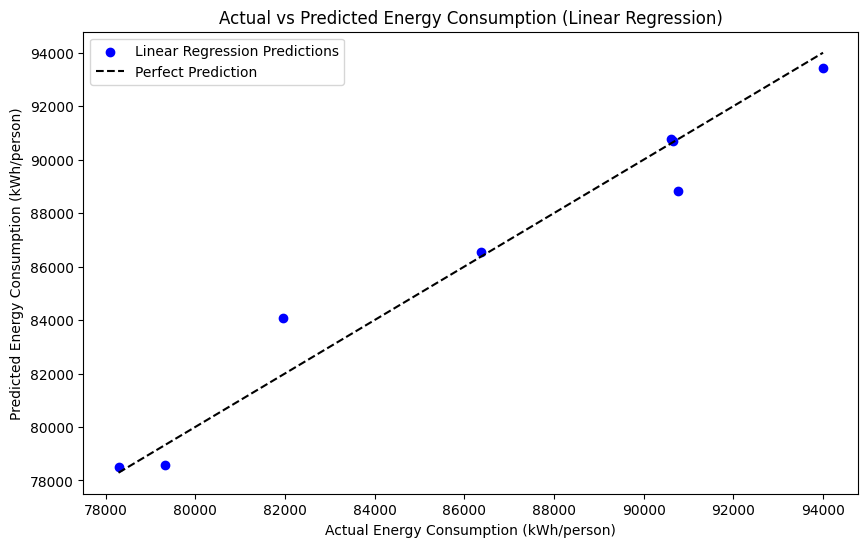

In [6]:
import matplotlib.pyplot as plt


# Plot Actual vs Predicted for Linear Regression
plt.figure(figsize=(10, 6))

# Scatter plot for actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', label='Linear Regression Predictions')

# Plotting the perfect prediction line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label='Perfect Prediction')

# Labels and title
plt.title('Actual vs Predicted Energy Consumption (Linear Regression)')
plt.xlabel('Actual Energy Consumption (kWh/person)')
plt.ylabel('Predicted Energy Consumption (kWh/person)')
plt.legend()

# Show the plot
plt.show()

Residual Variance: 1152975.6547894585


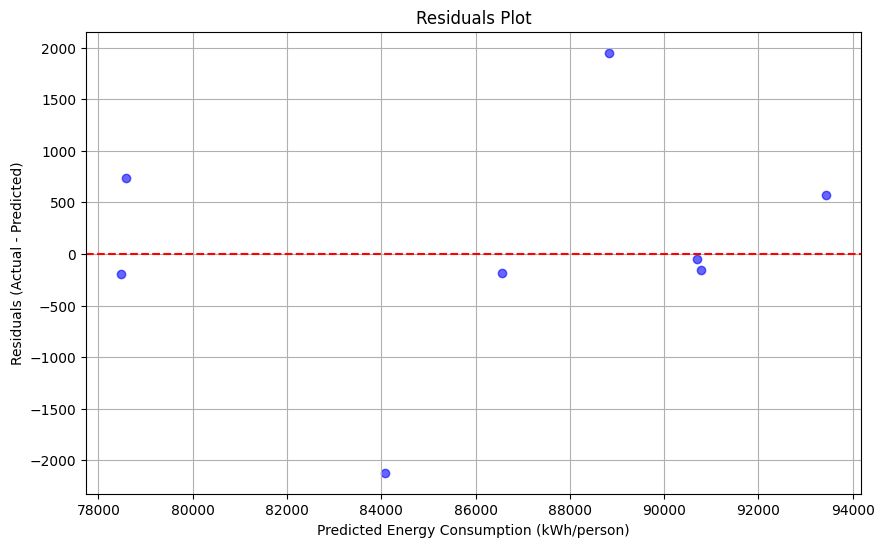

In [15]:
# Plot the residuals to further check the fit of linear regression
import matplotlib.pyplot as plt

# Calculate residuals (actual - predicted values)
residuals = y_test - y_pred
# Calculate residual variance
residual_variance = np.nanvar(residuals)
print(f"Residual Variance: {residual_variance}")
# Create the residuals plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y = 0
plt.title('Residuals Plot')
plt.xlabel('Predicted Energy Consumption (kWh/person)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()

In [8]:
# Moving on to decision trees to see if that would provide a better fit.
# Linear regression looks good but there's potential for a better fit.
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)

# Train the model
dt.fit(X_train, y_train)

# Predict on the test data
y_pred_dt = dt.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Print evaluation metrics
print(f"Decision Tree Mean Squared Error (MSE): {mse_dt:.2f}")
print(f"Decision Tree Root Mean Squared Error (RMSE): {rmse_dt:.2f}")
print(f"Decision Tree R-squared: {r2_dt:.4f}")

Decision Tree Mean Squared Error (MSE): 3746159.32
Decision Tree Root Mean Squared Error (RMSE): 1935.50
Decision Tree R-squared: 0.8793


Accuracy: 0.8793225863170392


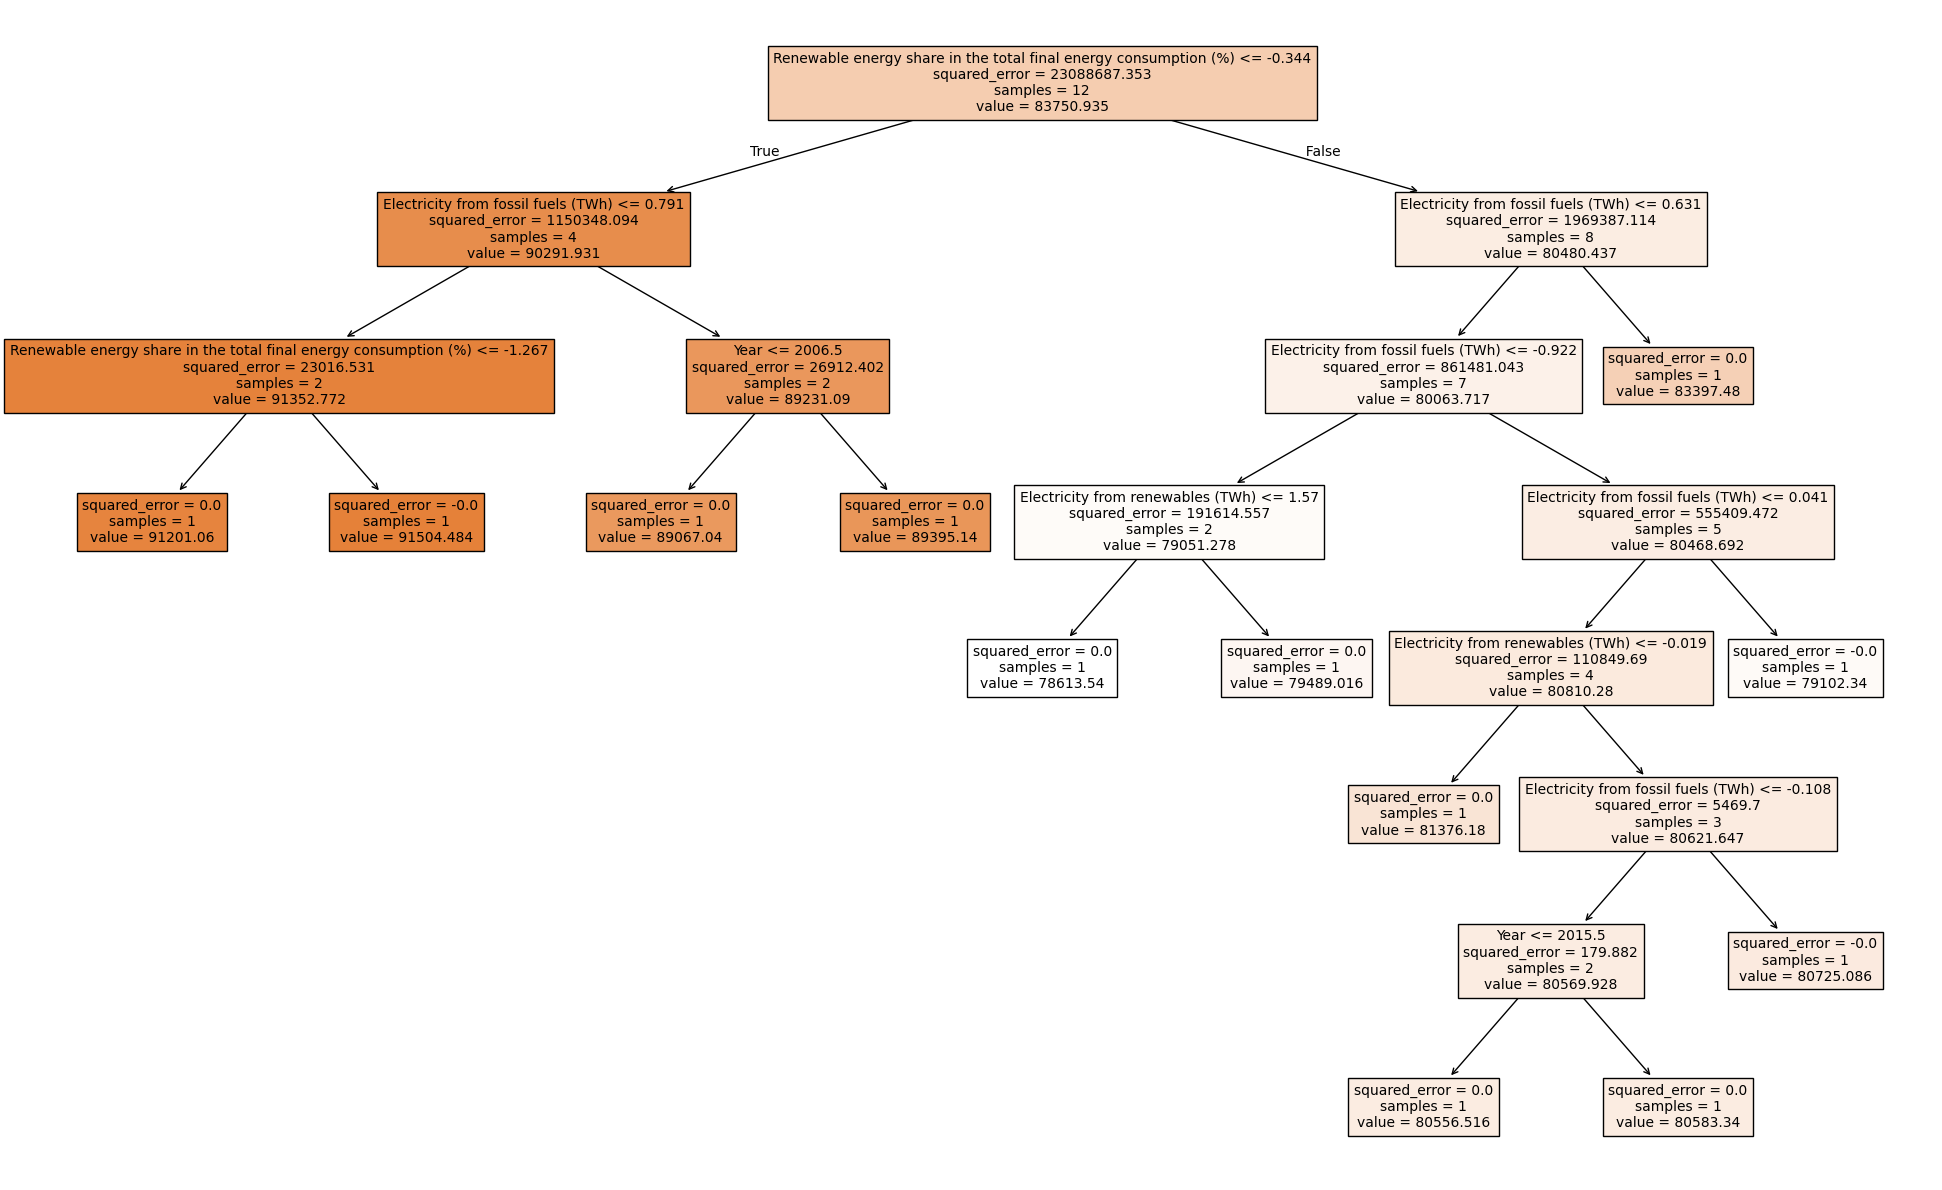

In [13]:
#Plot decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


accuracy = dt.score(X_test, y_test)
print("Accuracy:", accuracy)

# Plot the decision tree
plt.figure(figsize=(20, 12))
plot_tree(dt, filled=True, feature_names=X_train.columns, fontsize=10)
plt.tight_layout()
plt.show()

Plot for renewables vs. fossil fuels

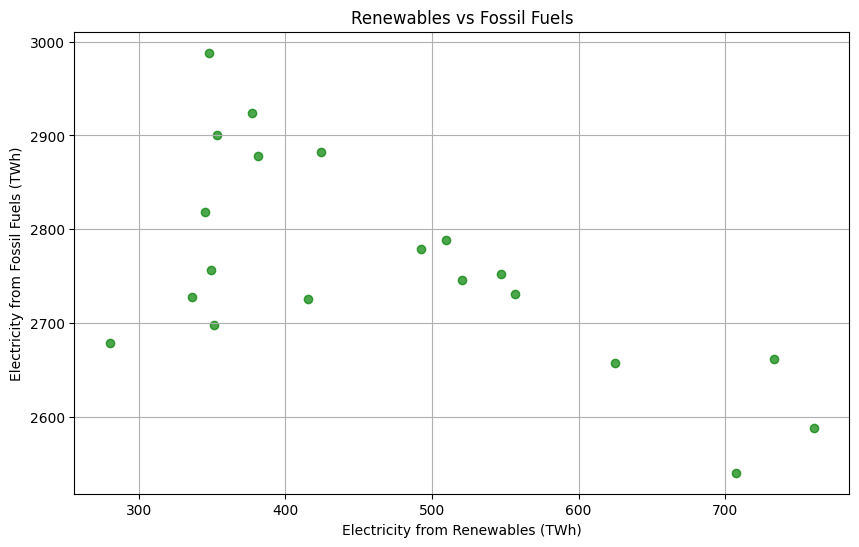

Correlation between Renewables and Energy Consumption: -0.8364421860664146
Correlation between Fossil Fuels and Energy Consumption: 0.43858708454876055


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Scatter plot: Renewables vs. Fossil Fuels
plt.figure(figsize=(10, 6))
plt.scatter(data_subset['Electricity from renewables (TWh)'],
            data_subset['Electricity from fossil fuels (TWh)'],
            alpha=0.7, c='green')
plt.title('Renewables vs Fossil Fuels')
plt.xlabel('Electricity from Renewables (TWh)')
plt.ylabel('Electricity from Fossil Fuels (TWh)')
plt.grid(True)
plt.show()

# Correlation coefficients
renewables_corr, _ = pearsonr(data_subset['Electricity from renewables (TWh)'],
                              data_subset['Primary energy consumption per capita (kWh/person)'])
fossil_fuels_corr, _ = pearsonr(data_subset['Electricity from fossil fuels (TWh)'],
                                data_subset['Primary energy consumption per capita (kWh/person)'])

print(f"Correlation between Renewables and Energy Consumption: {renewables_corr}")
print(f"Correlation between Fossil Fuels and Energy Consumption: {fossil_fuels_corr}")

# Now, I want to implement a model that will predict future energy consumption trends



Mean Squared Error: 2812260.479066479
R-squared: 0.9094068639540396


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


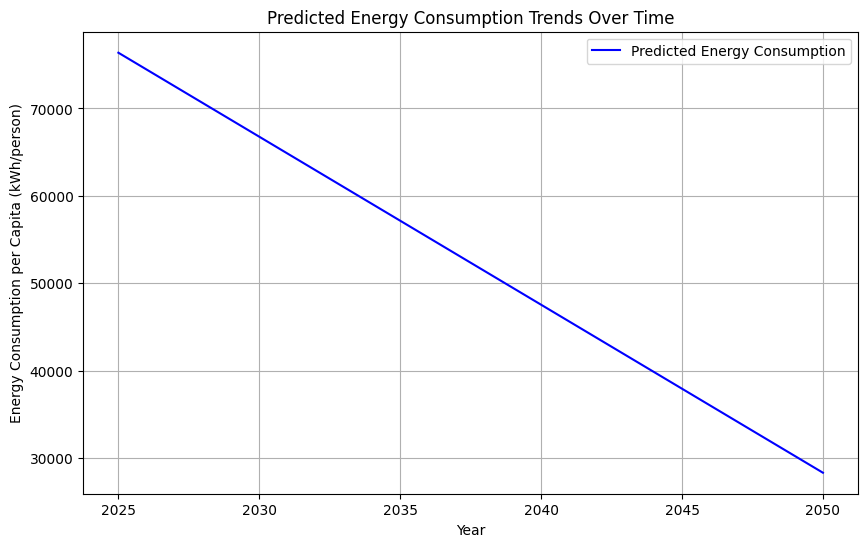

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Features and target variable
X_time = data_subset[['Year', 'Electricity from renewables (TWh)', 'Electricity from fossil fuels (TWh)']]
y = data_subset['Primary energy consumption per capita (kWh/person)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_time, y, test_size=0.4, random_state=42)

# Train a Linear Regression model
time_model = LinearRegression()
time_model.fit(X_train, y_train)

# Predict on the test set
y_pred = time_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Forecast future trends
future_years = np.arange(2025, 2051).reshape(-1, 1)  # Future years from 2025 to 2050
future_renewables = np.linspace(
    data_subset['Electricity from renewables (TWh)'].max(),
    data_subset['Electricity from renewables (TWh)'].max() + 200,
    len(future_years)
).reshape(-1, 1)
future_fossil = np.linspace(
    data_subset['Electricity from fossil fuels (TWh)'].max(),
    data_subset['Electricity from fossil fuels (TWh)'].max() - 200,
    len(future_years)
).reshape(-1, 1)

# Combine future data
future_data = np.hstack([future_years, future_renewables, future_fossil])

# Predict future energy consumption
future_predictions = time_model.predict(future_data)

# Plot the future trends
plt.figure(figsize=(10, 6))
plt.plot(future_years, future_predictions, label='Predicted Energy Consumption', color='blue')
plt.xlabel('Year')
plt.ylabel('Energy Consumption per Capita (kWh/person)')
plt.title('Predicted Energy Consumption Trends Over Time')
plt.legend()
plt.grid(True)
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Renewables Model Coefficient: -31.72817217632417
Fossil Fuels Model Coefficient: 25.25864699665144


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


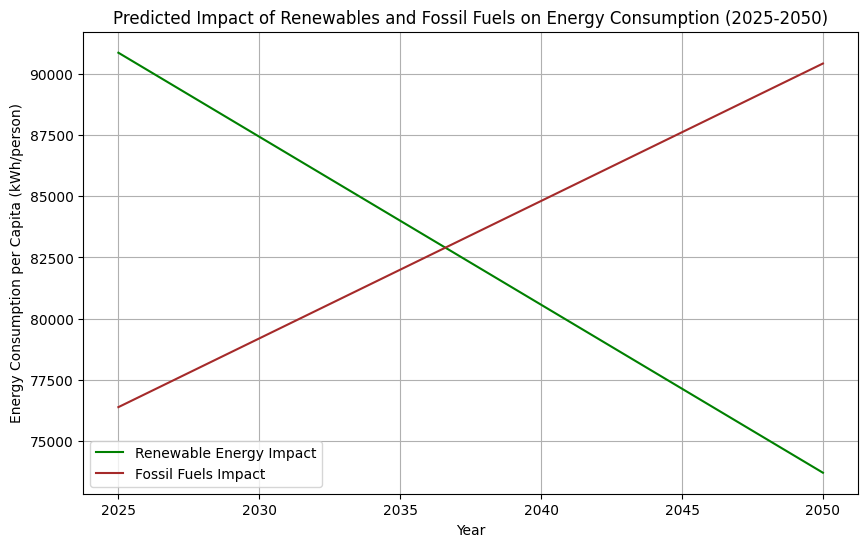

In [ ]:

from google.colab import drive
drive.mount('/content/drive')
filepath = '/content/drive/MyDrive/energy.csv'
# Filter the United States data and select relevant columns
data = data[data['Entity'] == 'United States']
relevant_columns = [
    'Year',
    'Electricity from fossil fuels (TWh)',
    'Electricity from renewables (TWh)',
    'Primary energy consumption per capita (kWh/person)'
]
data = data[relevant_columns].dropna()

# Separate features and target
X_renewables = data[['Electricity from renewables (TWh)']]
X_fossil_fuels = data[['Electricity from fossil fuels (TWh)']]
y = data['Primary energy consumption per capita (kWh/person)']

from sklearn.linear_model import LinearRegression
import numpy as np

# Train models
renewables_model = LinearRegression().fit(X_renewables, y)
fossil_fuels_model = LinearRegression().fit(X_fossil_fuels, y)

# Print coefficients for analysis
print("Renewables Model Coefficient:", renewables_model.coef_[0])
print("Fossil Fuels Model Coefficient:", fossil_fuels_model.coef_[0])

# Generate future years
future_years = np.arange(2025, 2051)

# Create projections for fossil fuels and renewables
renewable_projections = np.linspace(X_renewables.min().values[0], X_renewables.max().values[0], len(future_years)).reshape(-1, 1)
fossil_fuel_projections = np.linspace(X_fossil_fuels.min().values[0], X_fossil_fuels.max().values[0], len(future_years)).reshape(-1, 1)

# Predict future energy consumption
renewable_predictions = renewables_model.predict(renewable_projections)
fossil_fuel_predictions = fossil_fuels_model.predict(fossil_fuel_projections)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(future_years, renewable_predictions, label="Renewable Energy Impact", color="green")
plt.plot(future_years, fossil_fuel_predictions, label="Fossil Fuels Impact", color="brown")
plt.title("Predicted Impact of Renewables and Fossil Fuels on Energy Consumption (2025-2050)")
plt.xlabel("Year")
plt.ylabel("Energy Consumption per Capita (kWh/person)")
plt.legend()
plt.grid()
plt.show()
